# Predictive Model

The metrics that will be used to evaluate this stage are:

- **Diversity** of tasks (use of classification and regression) and of algorithms, this is, tested more than 4 with significantly different language bias OR with a significant number of variants.

- **Parameter Tuning**, with a systematic approach.

- **Understanding Algorithm Behavior**, solid (even if not deep) understanding of the behavior of most algorithms used OR <3 algorithms, also understanding the effect of parameters.

- Training and testing on properly separated data, with multiple splits.

- **Performance Estimation**, additional factors correctly taken into account (e.g. time), focus on performance measures aligned with DM goals and data characteristics, advanced performance measures (e.g. AUC), adequate baseline, correct analysis of values ​​for comparison, including tests of statistical significance, correct estimate of overfitting.

- **Model Improvement**, development guided by performance improvement goals, even if pedagogical goals have not been ignored.

- **Feature Importance**, correctly interpreted, related to the application domain.

- Analysis of "white box" models, correctly interpreted, related to the application domain

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

teams = pd.read_csv("data_prepared/teams.csv")
teams = teams.drop(columns=['teams_firstRound', 'teams_semis', 'teams_finals', 'teams_rank', 'teams_post_W', 'teams_post_L'])
teams['teams_playoff'] = teams['teams_playoff'].map({'Y': 1, 'N': 0})
teams['teams_confID'] = teams['teams_confID'].map({'EA': 0, 'WE': 1})

def encode_categorical_columns(df):
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        if col == 'teams_playoff' or col == 'teams_confID':
            continue
        else:
            df[col] = label_encoder.fit_transform(df[col])
    return df

encode_categorical_columns(teams)

teams.head(10)

,teams_year,teams_tmID,teams_confID,teams_playoff,teams_o_fgm,teams_o_fga,teams_o_ftm,teams_o_fta,teams_o_3pm,teams_o_3pa,...,teams_d_blk,teams_won,teams_lost,teams_homeW,teams_confW,teams_confL,teams_min,teams_attend,teams_awards_players,teams_awards_coaches
0,9,0,0,0,895,2258,542,725,202,598,...,134,4,30,1,2,18,6825,141379,0,0
1,10,0,0,1,1089,2428,569,755,114,374,...,133,18,16,12,10,12,6950,120737,1,1
2,1,1,0,0,812,1903,431,577,131,386,...,123,8,24,5,5,16,6475,90963,0,0
3,1,1,0,0,812,1903,431,577,131,386,...,123,8,24,5,5,16,6475,90963,0,0
4,1,1,0,0,812,1903,431,577,131,386,...,123,8,24,5,5,16,6475,90963,0,0
5,2,1,0,1,746,1780,410,528,153,428,...,124,18,14,11,15,6,6500,105525,0,0
6,2,1,0,1,746,1780,410,528,153,428,...,124,18,14,11,15,6,6500,105525,0,0
7,2,1,0,1,746,1780,410,528,153,428,...,124,18,14,11,15,6,6500,105525,0,0
8,3,1,0,1,770,1790,490,663,211,527,...,103,18,14,11,12,9,6450,106670,0,0
9,3,1,0,1,770,1790,490,663,211,527,...,103,18,14,11,12,9,6450,106670,0,0


## 1 - Algorithms

### 1.1 - Decision Tree


Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.74      0.85        19

    accuracy                           0.85        34
   macro avg       0.88      0.87      0.85        34
weighted avg       0.89      0.85      0.85        34

Accuracy: 0.85


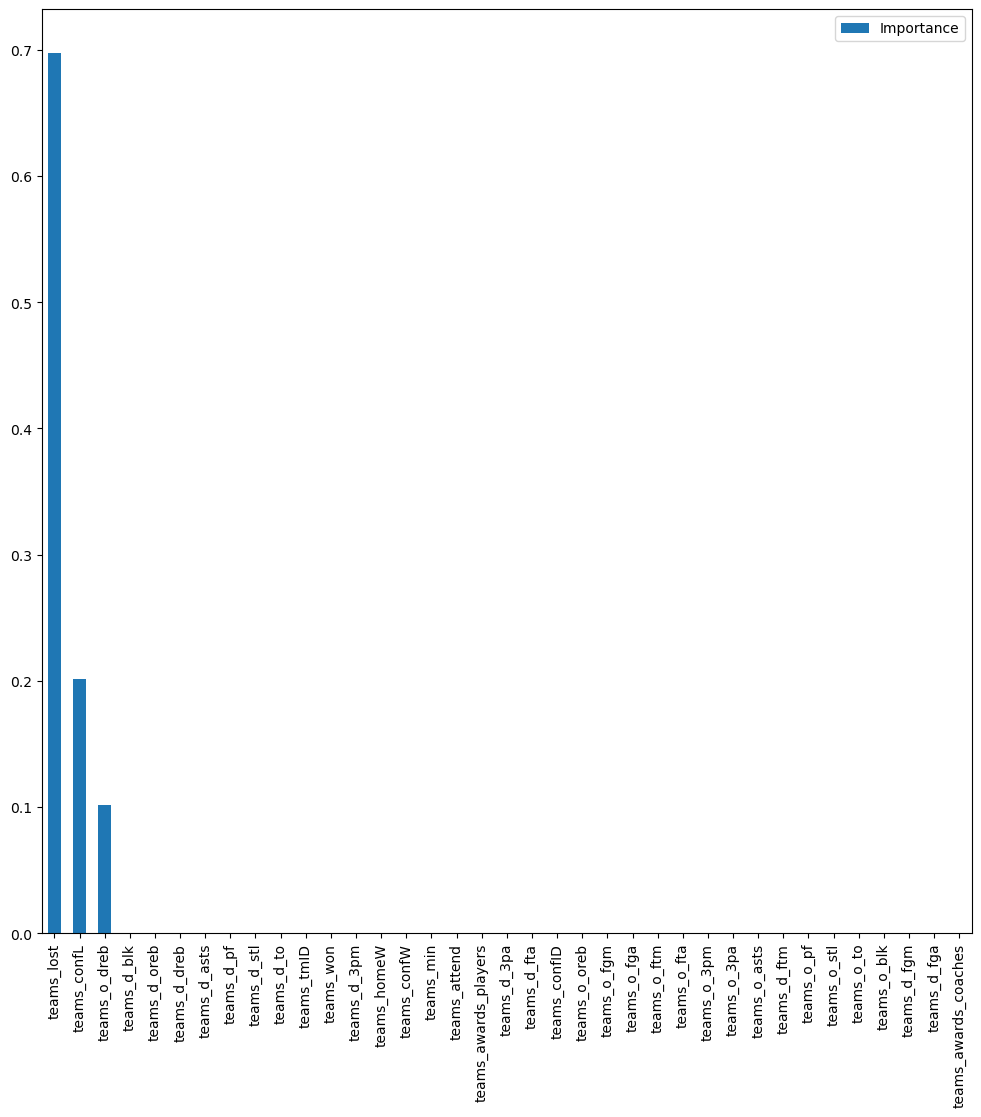

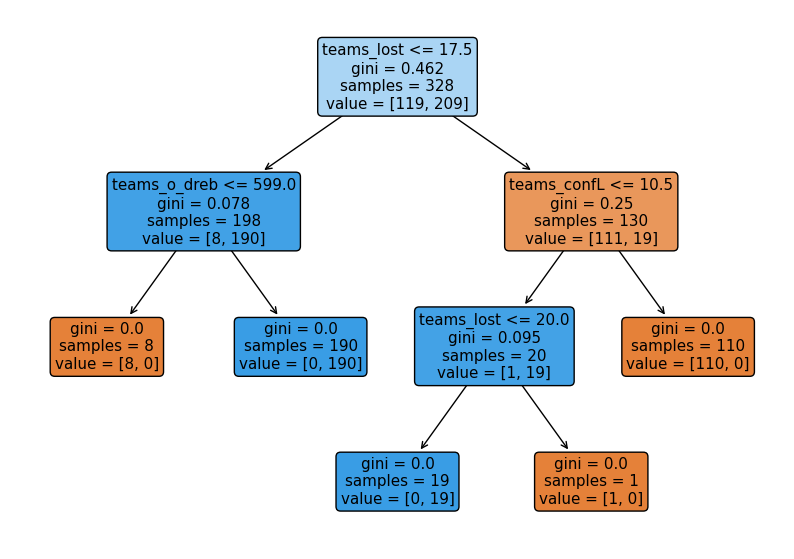


Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.79      0.88        24

    accuracy                           0.85        34
   macro avg       0.83      0.90      0.84        34
weighted avg       0.90      0.85      0.86        34

Accuracy: 0.85


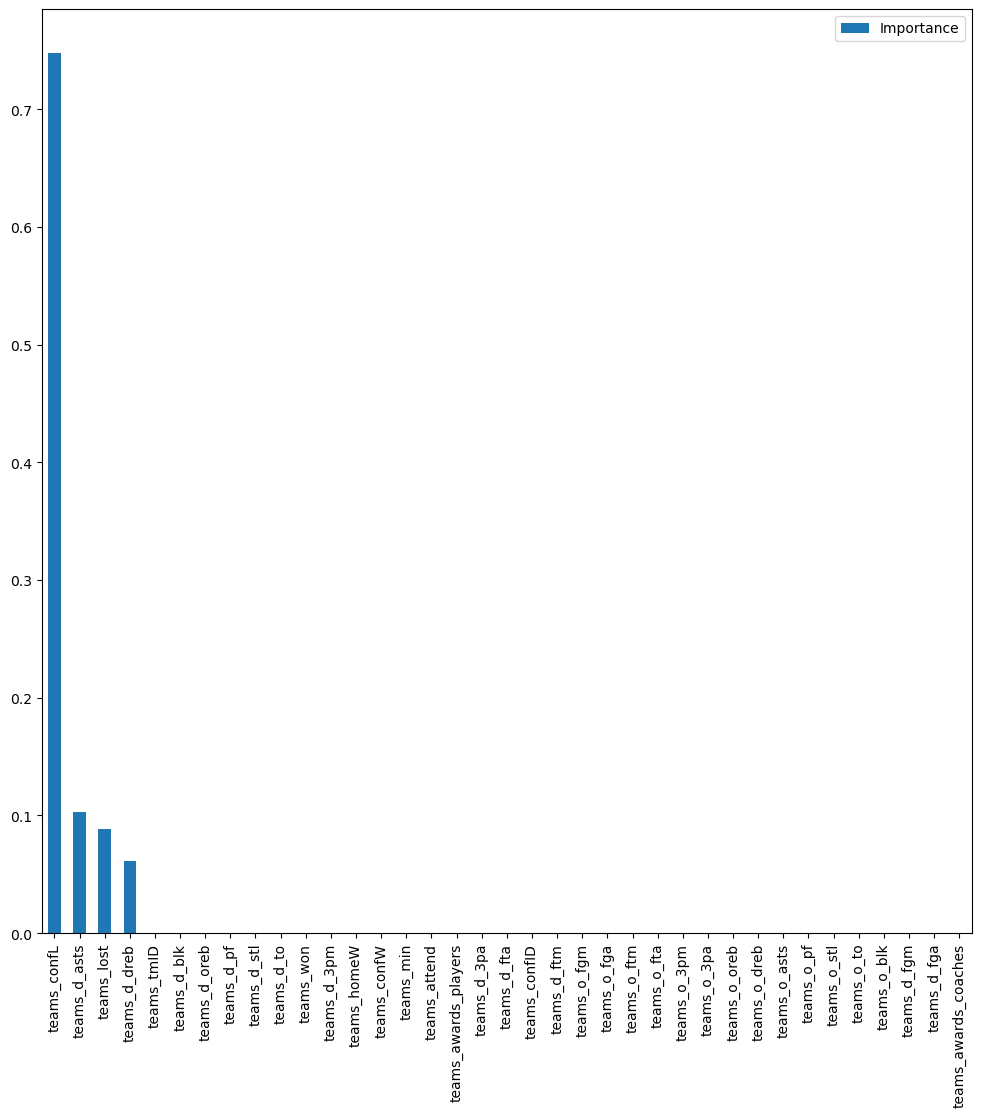

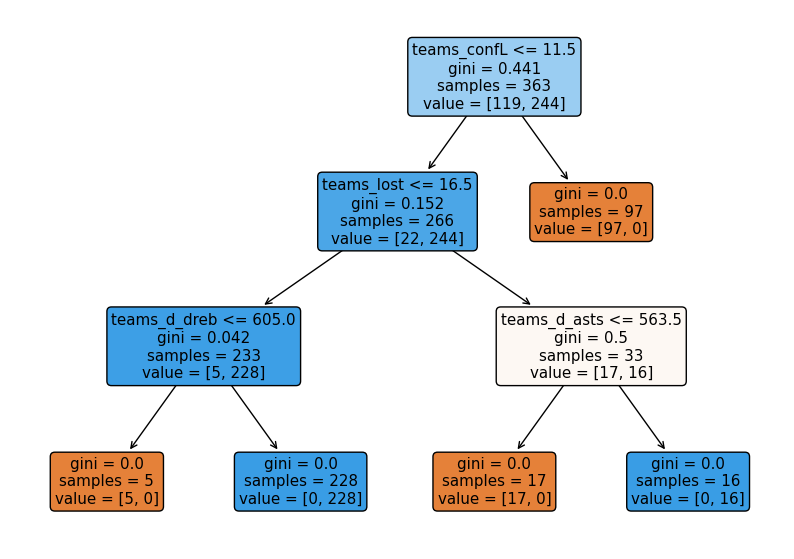


Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        25
           1       1.00      0.77      0.87        43

    accuracy                           0.85        68
   macro avg       0.86      0.88      0.85        68
weighted avg       0.89      0.85      0.86        68

Accuracy: 0.85


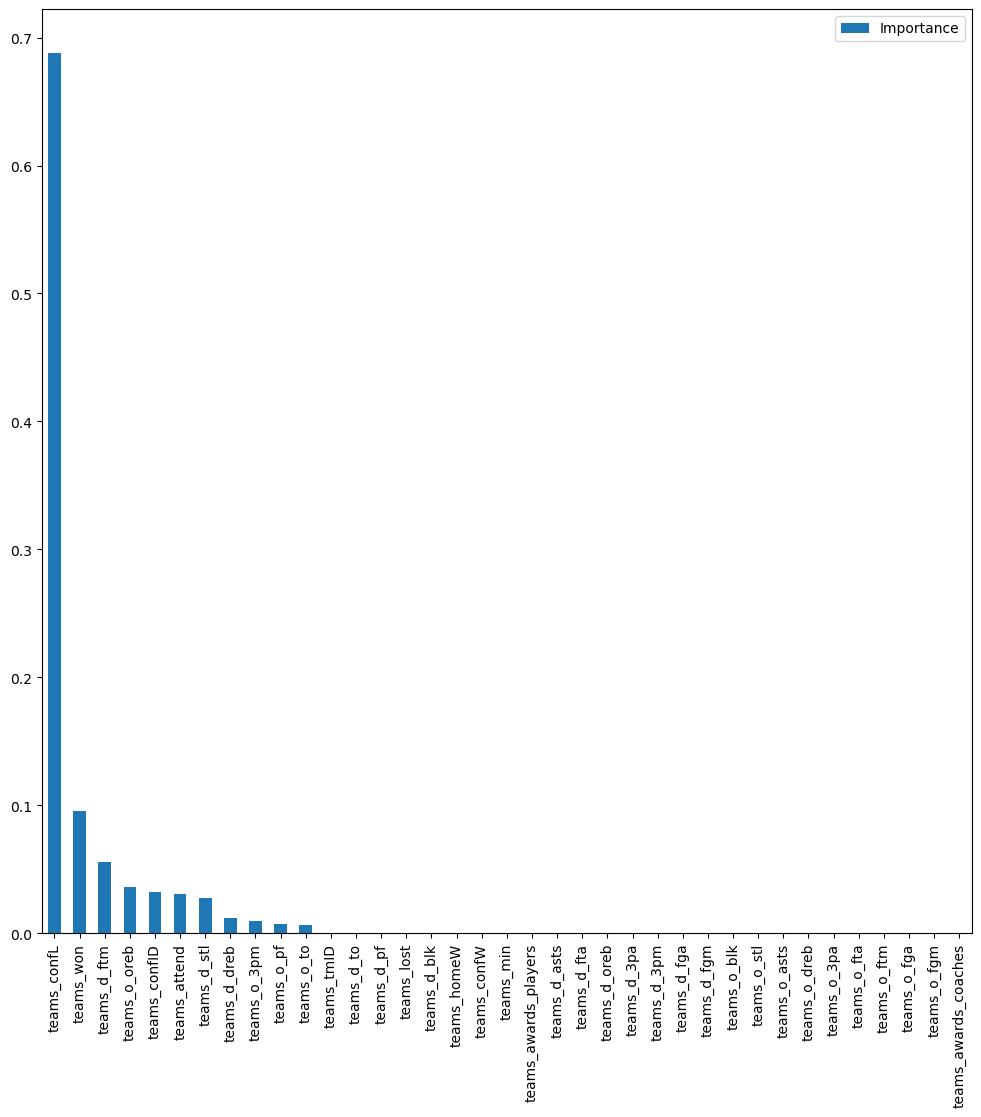

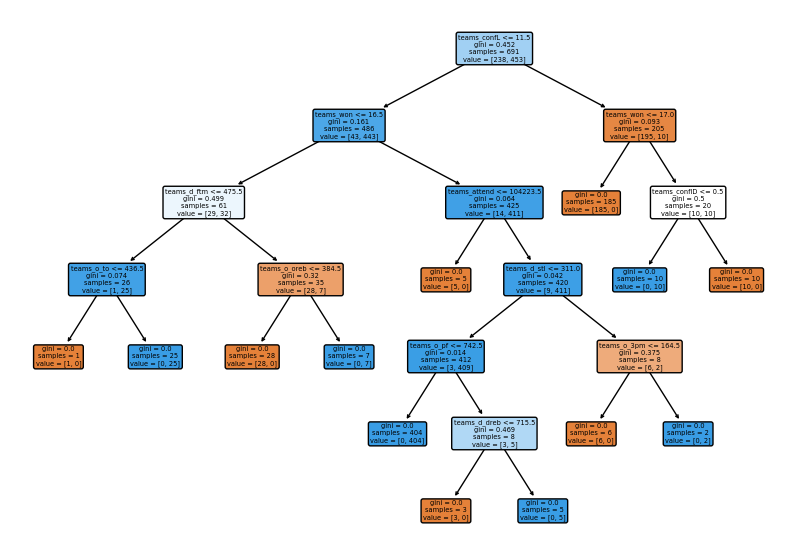

In [204]:
def algorithm(data, year, number):

    train = data[data['teams_year'] < year]
    test = data[data['teams_year'] == year]

    train.drop("teams_year", axis=1, inplace=True)
    test.drop("teams_year", axis=1, inplace=True)

    X_train = train.drop("teams_playoff", axis=1)
    Y_train = train["teams_playoff"]

    X_test = test.drop("teams_playoff", axis=1)
    Y_test = test["teams_playoff"]

    decision_tree = DecisionTreeClassifier(random_state=42)
    decision_tree.fit(X_train, Y_train)
    
    y_pred = decision_tree.predict(X_test)
    print(f"\nClassification Report:\n", classification_report(Y_test, y_pred))
    print(f"Accuracy: {accuracy_score(Y_test, y_pred):.2f}")

    # y_pred_proba = decision_tree.predict_proba(X_test)[:, 1]
    # y_pred = np.zeros_like(y_pred_proba) 
    # top_8_indices = np.argsort(y_pred_proba)[-number:]
    # y_pred[top_8_indices] = 1

    feature_importances_df = pd.DataFrame(decision_tree.feature_importances_, index=X_train.columns, columns=["Importance"])
    feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)
    feature_importances_df.plot(kind='bar', figsize=(12, 12))

    plt.figure(figsize=(10, 7))
    plot_tree(decision_tree, filled=True, feature_names=X_test.columns.to_list(), rounded=True)
    plt.show()

algorithm(teams[teams['teams_confID']==0],10,4)
algorithm(teams[teams['teams_confID']==1],10,4)
algorithm(teams,10,8)

1.2 - Support Vector Machine

In [205]:
def algorithm_svm(data, year, numberSeclected):
    # train = data[data['teams_year'] < year]
    # test = data[data['teams_year'] == year]

    # x_test = pd.get_dummies(test.drop(columns=['teams_playoff']), drop_first=True)
    # x_train = pd.get_dummies(train.drop(columns=['teams_playoff']), drop_first=True)
    # y_train = train['teams_playoff']

    # x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

    train = data[data['teams_year'] < year]
    test = data[data['teams_year'] == year]

    train.drop("teams_year", axis=1, inplace=True)
    test.drop("teams_year", axis=1, inplace=True)

    X_train = train.drop("teams_playoff", axis=1)
    Y_train = train["teams_playoff"]

    X_test = test.drop("teams_playoff", axis=1)
    Y_test = test["teams_playoff"]

    # Usar Support Vector Machine
    svm = SVC(probability=True, random_state=42)
    svm.fit(X_train, Y_train)
    y_pred = svm.predict(X_test)
    # y_pred_proba = svm.predict_proba(X_test)[:, 1]

    # y_pred = np.zeros_like(y_pred_proba) 
    # top_8_indices = np.argsort(y_pred_proba)[-numberSeclected:]
    # y_pred[top_8_indices] = 1
    print(f"\nClassification Report:\n", classification_report(Y_test, y_pred))
    print(f"Accuracy: {accuracy_score(Y_test, y_pred):.2f}")
    # accuracy = accuracy_score(test['teams_playoff'], y_pred)
    # print(f"SVM Accuracy: {accuracy:.2f}")
    # print(y_pred)

# Chamar a função para Support Vector Machine
algorithm_svm(teams[teams['teams_confID']==0], 10, 4)
algorithm_svm(teams[teams['teams_confID']==1], 10, 4)
algorithm_svm(teams, 10, 8)



Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.56      1.00      0.72        19

    accuracy                           0.56        34
   macro avg       0.28      0.50      0.36        34
weighted avg       0.31      0.56      0.40        34

Accuracy: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.71      1.00      0.83        24

    accuracy                           0.71        34
   macro avg       0.35      0.50      0.41        34
weighted avg       0.50      0.71      0.58        34

Accuracy: 0.71

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.63      1.00      0.77        43

    accuracy                           0.63        68
   macro avg       0.32

### 1.3 - Grandient Boosting


Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       1.00      0.74      0.85        19

    accuracy                           0.85        34
   macro avg       0.88      0.87      0.85        34
weighted avg       0.89      0.85      0.85        34

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.79      0.88        24

    accuracy                           0.85        34
   macro avg       0.83      0.90      0.84        34
weighted avg       0.90      0.85      0.86        34

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89        25
           1       1.00      0.86      0.92        43

    accuracy                           0.91        68
   macro avg       0.90

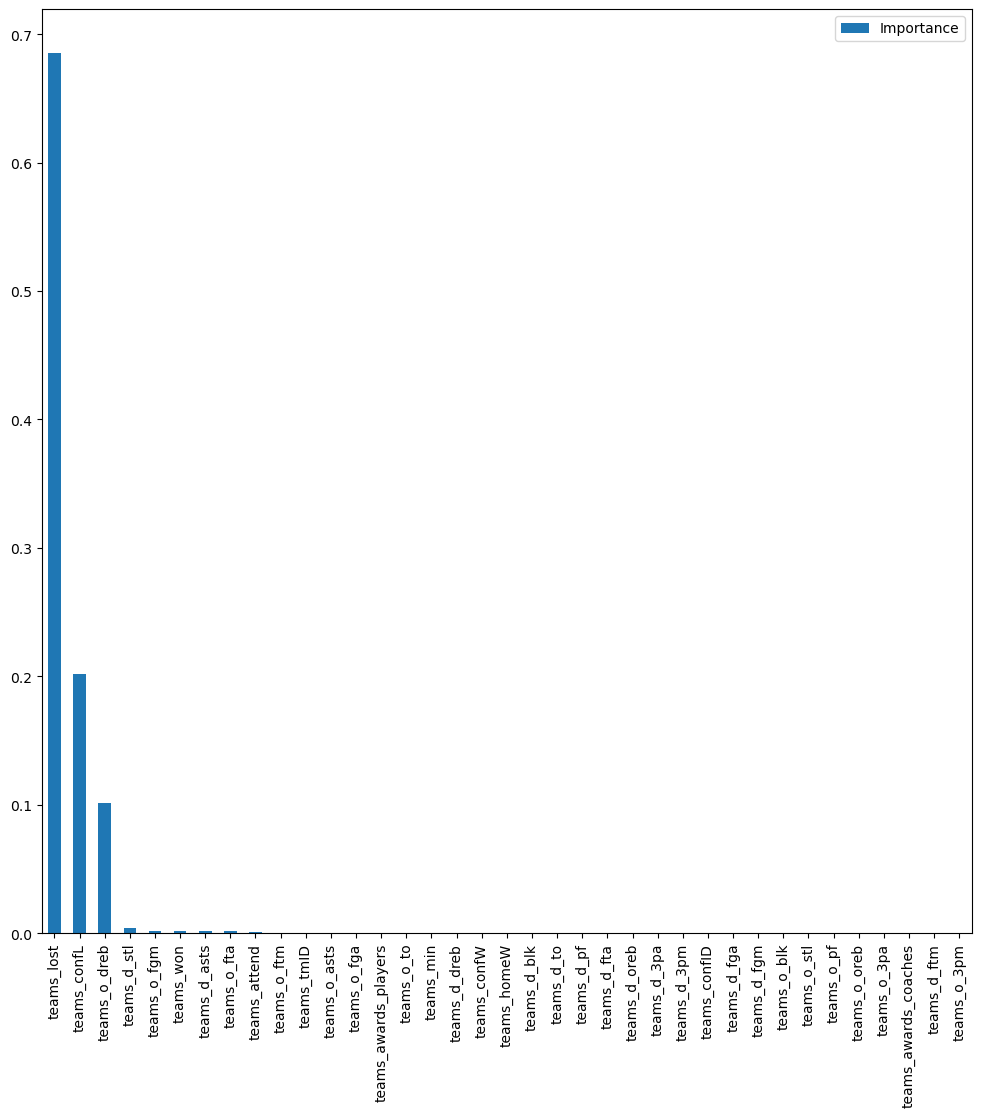

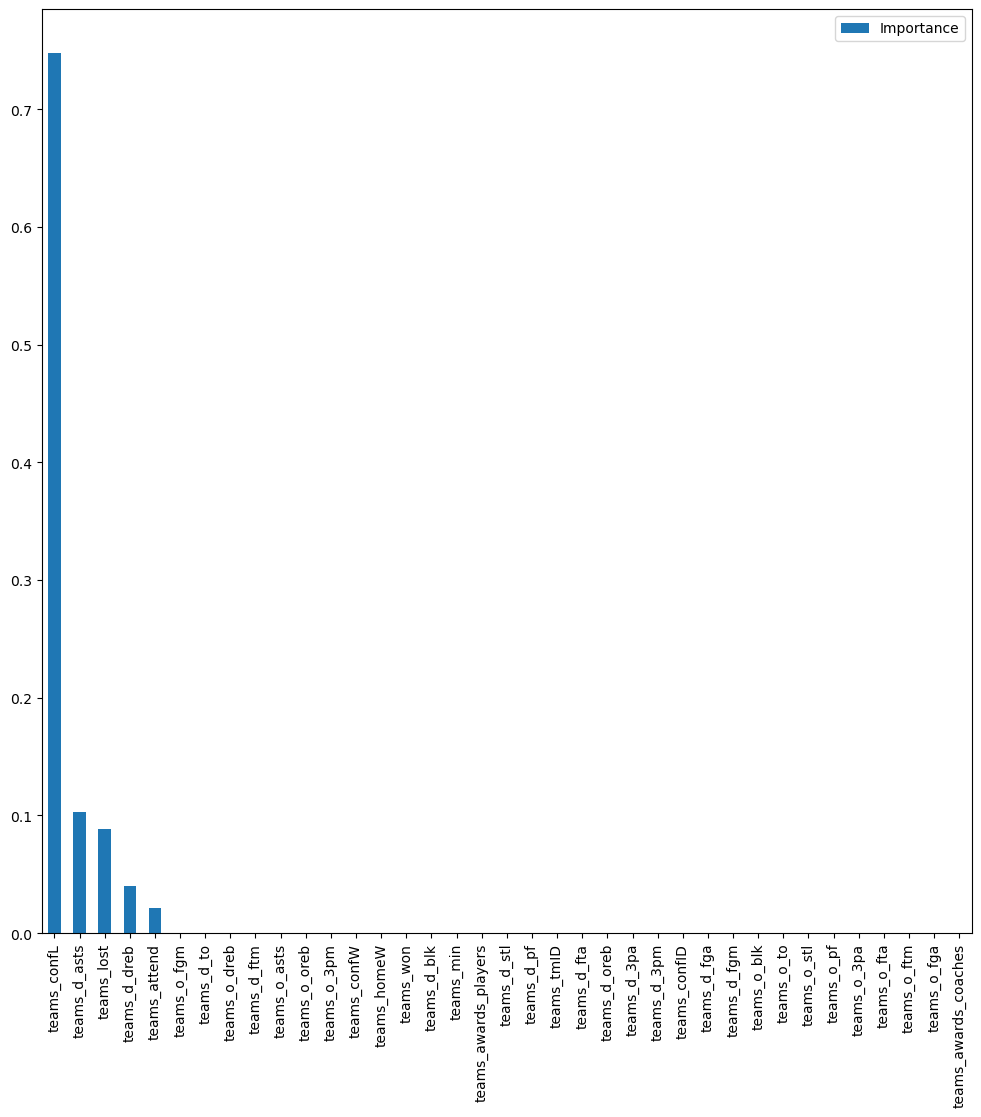

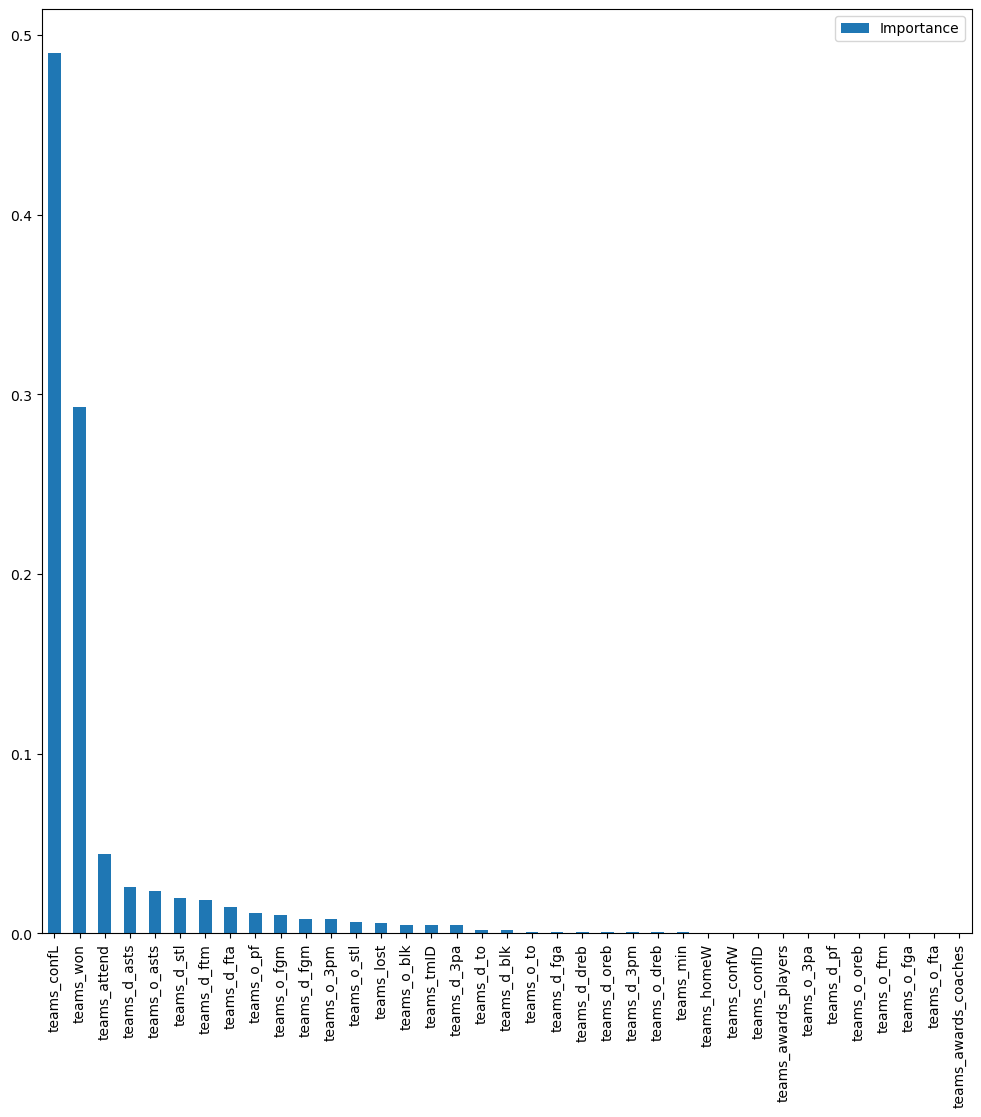

In [206]:
def algorithm_gradient_boosting(data, year, numberSeclected):
    # train = data[data['teams_year'] < year]
    # test = data[data['teams_year'] == year]

    # x_test = pd.get_dummies(test.drop(columns=['teams_playoff']), drop_first=True)
    # x_train = pd.get_dummies(train.drop(columns=['teams_playoff']), drop_first=True)
    # y_train = train['teams_playoff']

    # x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

    train = data[data['teams_year'] < year]
    test = data[data['teams_year'] == year]

    train.drop("teams_year", axis=1, inplace=True)
    test.drop("teams_year", axis=1, inplace=True)

    X_train = train.drop("teams_playoff", axis=1)
    Y_train = train["teams_playoff"]

    X_test = test.drop("teams_playoff", axis=1)
    Y_test = test["teams_playoff"]

    # Usar Gradient Boosting
    gradient_boosting = GradientBoostingClassifier(random_state=42)
    gradient_boosting.fit(X_train, Y_train)
    y_pred = gradient_boosting.predict(X_test)
    # y_pred_proba = gradient_boosting.predict_proba(X_test)[:, 1]

    # y_pred = np.zeros_like(y_pred_proba) 
    # top_8_indices = np.argsort(y_pred_proba)[-numberSeclected:]
    # y_pred[top_8_indices] = 1

    # accuracy = accuracy_score(test['teams_playoff'], y_pred)
    # print(f"Gradient Boosting Accuracy: {accuracy:.2f}")

    print(f"\nClassification Report:\n", classification_report(Y_test, y_pred))
    print(f"Accuracy: {accuracy_score(Y_test, y_pred):.2f}")

    feature_importances_df = pd.DataFrame(
        gradient_boosting.feature_importances_,
        index=X_train.columns,
        columns=["Importance"]
    )
    feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)
    feature_importances_df.plot(kind='bar', figsize=(12, 12))
    # print(feature_importances_df.head(10))
    # print(y_pred)

# Chamar a função para Gradient Boosting
algorithm_gradient_boosting(teams[teams['teams_confID']==0], 10, 4)
algorithm_gradient_boosting(teams[teams['teams_confID']==1], 10, 4)
algorithm_gradient_boosting(teams, 10, 8)


### 1.4 - K Nearest Neighbors

In [207]:
def algorithm_knn(data, year, numberSeclected):
    # train = data[data['teams_year'] < year]
    # test = data[data['teams_year'] == year]

    # x_test = pd.get_dummies(test.drop(columns=['teams_playoff']), drop_first=True)
    # x_train = pd.get_dummies(train.drop(columns=['teams_playoff']), drop_first=True)
    # y_train = train['teams_playoff']

    # x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

    train = data[data['teams_year'] < year]
    test = data[data['teams_year'] == year]

    train.drop("teams_year", axis=1, inplace=True)
    test.drop("teams_year", axis=1, inplace=True)

    X_train = train.drop("teams_playoff", axis=1)
    Y_train = train["teams_playoff"]

    X_test = test.drop("teams_playoff", axis=1)
    Y_test = test["teams_playoff"]

    # Usar K-Nearest Neighbors
    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)

    y_pred = knn.predict(X_test)
    print(f"\nClassification Report:\n", classification_report(Y_test, y_pred))
    print(f"Accuracy: {accuracy_score(Y_test, y_pred):.2f}")
    # y_pred_proba = knn.predict_proba(x_test)[:, 1]

    # y_pred = np.zeros_like(y_pred_proba) 
    # top_8_indices = np.argsort(y_pred_proba)[-numberSeclected:]
    # y_pred[top_8_indices] = 1

    # accuracy = accuracy_score(test['teams_playoff'], y_pred)
    # print(f"KNN Accuracy: {accuracy:.2f}")
    # print(y_pred)

# Chamar a função para KNN
algorithm_knn(teams[teams['teams_confID']==0], 10, 4)
algorithm_knn(teams[teams['teams_confID']==1], 10, 4)
algorithm_knn(teams, 10, 8)



Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.53      0.57        15
           1       0.67      0.74      0.70        19

    accuracy                           0.65        34
   macro avg       0.64      0.64      0.64        34
weighted avg       0.64      0.65      0.64        34

Accuracy: 0.65

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.55      0.50      0.52        24

    accuracy                           0.35        34
   macro avg       0.27      0.25      0.26        34
weighted avg       0.39      0.35      0.37        34

Accuracy: 0.35

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.32      0.35        25
           1       0.64      0.70      0.67        43

    accuracy                           0.56        68
   macro avg       0.51

In [ ]:
def encode_categorical_columns(df):
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        if(col=='teams_confID'):
            continue
        df[col] = label_encoder.fit_transform(df[col])
    return df

def prepare_data(data, year):

    train = data[data['teams_year'] < year]
    test = data[(data['teams_year'] == year)]
    
    x_train = pd.get_dummies(train.drop(columns=['teams_playoff']), drop_first=True)
    y_train = train['teams_playoff']
    x_test = pd.get_dummies(test.drop(columns=['teams_playoff']), drop_first=True)

    x_train, x_test = x_train.align(x_test, join='left', axis=1, fill_value=0)

    return x_train, y_train, x_test, test['teams_playoff']

def train_and_evaluate_model(x_train, y_train, x_test, y_test):

    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    model = Sequential()
    model.add(Dense(units=64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)    
    loss, accuracy = model.evaluate(x_test, y_test)
    print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

    y_pred_proba = model.predict(x_test)
    y_pred = (y_pred_proba > 0.5).astype(int)
    print(classification_report(y_test, y_pred))

    return history, y_test, y_pred

def print_predictions(y_test, y_pred, test_data):
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
    results = pd.concat([results, test_data.reset_index(drop=True)], axis=1)
    print(results)

teams = encode_categorical_columns(teams)

x_train_EA, y_train_EA, x_test_EA, y_test_EA = prepare_data(teams[teams['teams_confID'] == 0], 10)
history_EA, y_test_EA, y_pred_EA = train_and_evaluate_model(x_train_EA, y_train_EA, x_test_EA, y_test_EA)
print_predictions(y_test_EA, y_pred_EA, x_test_EA)

x_train_WE, y_train_WE, x_test_WE, y_test_WE = prepare_data(teams[teams['teams_confID']== 1], 10)
history_WE, y_test_WE, y_pred_WE = train_and_evaluate_model(x_train_WE, y_train_WE, x_test_WE, y_test_WE)
print_predictions(y_test_WE, y_pred_WE, x_test_WE)


Epoch 1/50
